In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Image conversion into binary form using binarize function according to threshold
def binarize (image_to_transform, threshold):
  # Converting to grayscale
  output_image = image_to_transform.convert("L")
  for x in range (output_image.width):
    for y in range (output_image.height):
      if output_image.getpixel ((x, y)) < threshold:
        output_image.putpixel((x, y), 0)
      else:
        output_image.putpixel((x, y), 255)
  return output_image

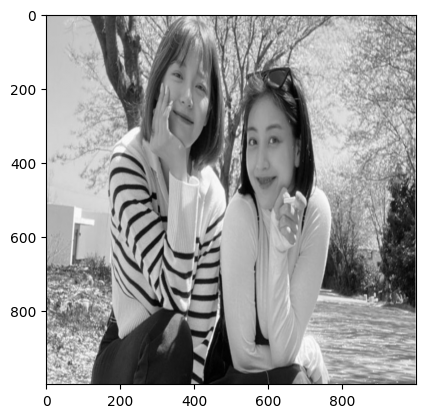

In [ ]:
#Open the Image to be watermarked
Cover_img = Image.open("/content/Dataset steganografi dan watermarking (Kim Se-jeong).jpg")
#Resize image
newsize=(1000,1000)
Cover_img = Cover_img.resize(newsize)
# Converting image into grayscale
Cover_img = Cover_img. convert("L")
plt.imshow (Cover_img,cmap='gray')

In [ ]:
#Open Watermarking Image
Watermark_Img = Image.open('/content/Citra Label Watermark.png')
#Resize Watermarking image
newsize=(1000,1000)
Watermark_Img = Watermark_Img.resize(newsize)

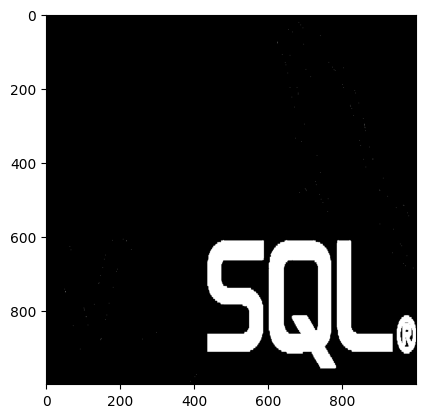

In [ ]:
#transformation into binary form (Pixels with values below 128 will be changed to 0 [black]
# and those with values above 128 to 255 [white])
Watermark_Img = binarize (Watermark_Img,128)
plt.imshow(Watermark_Img,cmap='gray')

In [ ]:
#Flatten cover image and convert it into numpy array
Cover_array = np.array(list (Cover_img.getdata()))
#Flatten watermark image and convert it into numpy array
Water_array =  np.array (list (Watermark_Img.getdata()))

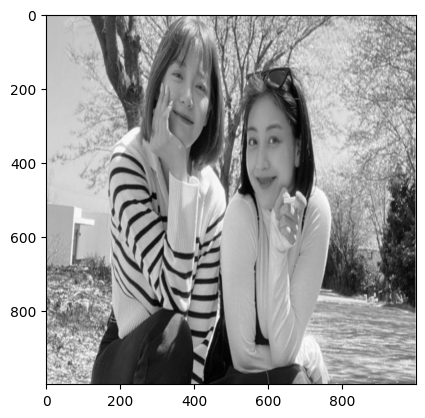

In [ ]:
#Watermarking the original image by adding a value of 0 or 1 depending on the watermarking image's pixel intensity
for p in range (1000000):
  binl = bin (Cover_array [p]) [2:-1]
  x = bin (Water_array [p]) [2]
  binl += x
  Cover_array [p]=int (binl, 2)
#Converting watermarked array into image
Cover_array = Cover_array.reshape (1000,1000)
enc_img = Image.fromarray (Cover_array.astype('uint8'), Cover_img.mode)
plt.imshow(enc_img,cmap='gray')

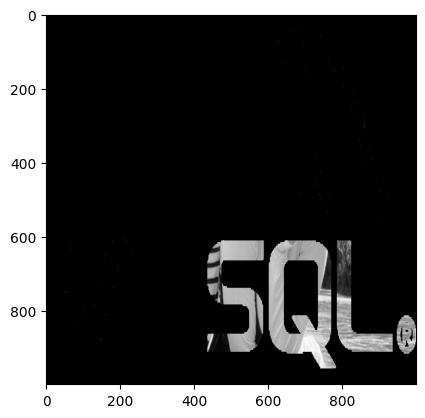

In [ ]:
# Extracting watermark from watermarked image
Ext_array = np.array (list(enc_img.getdata()))
for p in range(1000000):
  if bin (Ext_array [p]) [-1]=='1': Ext_array [p]-255
  else: Ext_array [p]=0
#Display extracted watermark
Ext_array =Ext_array.reshape(1000,1000)
enc_imgl = Image.fromarray (Ext_array.astype('uint8'), Watermark_Img.mode)
plt.imshow(enc_imgl,cmap='gray')

Gambar berhasil disimpan sebagai 'hasil_terwatermark.jpg'


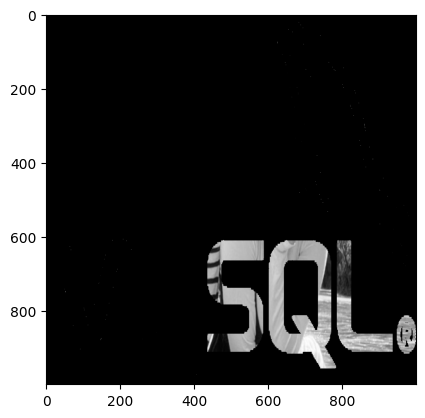

In [ ]:
# Extracting watermark from watermarked image
Ext_array = np.array(list(enc_img.getdata()))
for p in range(1000000):
    if bin(Ext_array[p])[-1] == '1':
        Ext_array[p] = Ext_array[p] - 255
    else:
        Ext_array[p] = 0

# Display extracted watermark
Ext_array = Ext_array.reshape(1000, 1000)
enc_imgl = Image.fromarray(Ext_array.astype('uint8'), Watermark_Img.mode)
plt.imshow(enc_imgl, cmap='gray')

# Simpan hasil ekstraksi watermark dalam format JPEG
enc_imgl.save("hasil_terwatermark.jpg", format="JPEG")
print("Gambar berhasil disimpan sebagai 'hasil_terwatermark.jpg'")


In [ ]:
# Load gambar asli (berwarna) dan watermark biner
cover_img_color = Image.open("/content/Dataset steganografi dan watermarking (Kim Se-jeong).jpg").resize((1000, 1000))
watermark_img = Image.open("/content/output.png").resize((1000, 1000)).convert("L")  # Pastikan grayscale

# Pisahkan channel warna dari gambar asli
r, g, b = cover_img_color.split()
r_array = np.array(r)
water_array = np.array(watermark_img)

# Sisipkan watermark ke channel merah
for i in range(1000):
    for j in range(1000):
        r_bin = list(bin(r_array[i, j])[2:].zfill(8))  # ambil 8 bit
        r_bin[-1] = '1' if water_array[i, j] == 255 else '0'  # LSB
        r_array[i, j] = int("".join(r_bin), 2)

# Gabungkan kembali channel dengan watermark disisipkan
r_new = Image.fromarray(r_array.astype('uint8'))
watermarked_color_image = Image.merge("RGB", (r_new, g, b))

# Simpan hasil
output_path = "/content/Watermarked_Color_Image_Final.png"
watermarked_color_image.save(output_path)

output_path


'/content/Watermarked_Color_Image_Final.png'

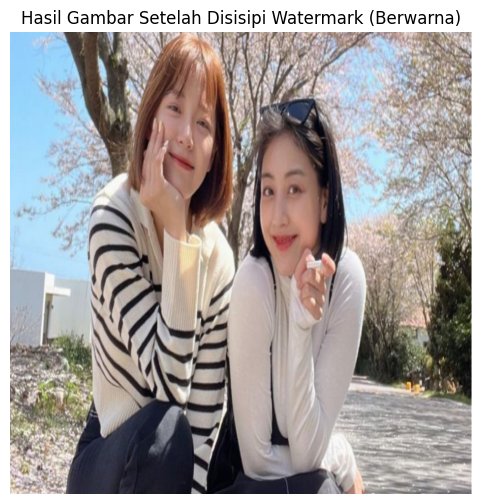

In [ ]:
# Tampilkan gambar hasil watermark berwarna
result_img_path = "/content/Watermarked_Color_Image_Final.png"
result_img = Image.open(result_img_path)

# Plot hasil
plt.figure(figsize=(6, 6))
plt.imshow(result_img)
plt.axis('off')
plt.title("Hasil Gambar Setelah Disisipi Watermark (Berwarna)")
plt.show()

In [ ]:
!pip install opencv-python pywavelets numpy

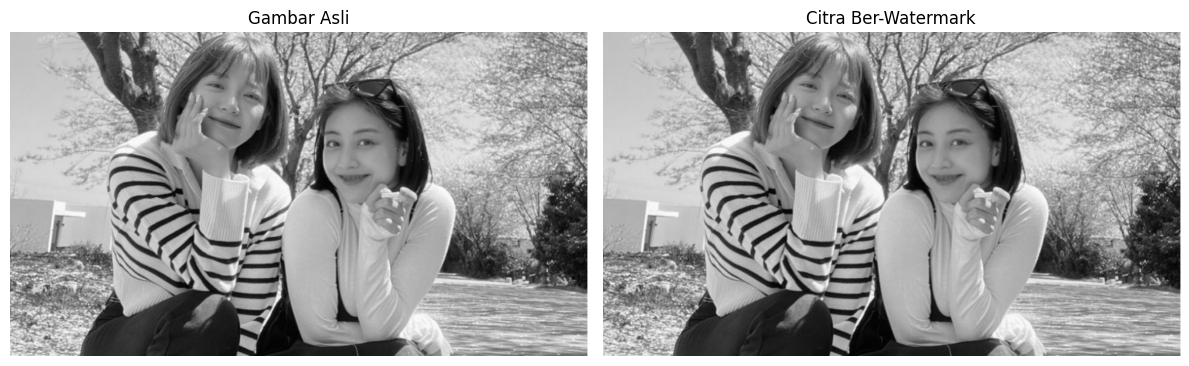

True

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def watermark_to_binary(img):
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary = np.where(grayscale < 128, -1, 1)
    return binary

# Load gambar asli dan watermark
img_asli = cv2.imread('/content/Dataset steganografi dan watermarking (Kim Se-jeong).jpg', cv2.IMREAD_GRAYSCALE)
img_watermark = cv2.imread('/content/Citra Label Watermark.png')

# Resize watermark ke 1/4 ukuran gambar asli
h, w = img_asli.shape
img_watermark = cv2.resize(img_watermark, (w//4, h//4))
W = watermark_to_binary(img_watermark)

# Dekomposisi 2-level DWT
coeffs = pywt.wavedec2(img_asli, wavelet='haar', level=2)

# Uraikan koefisien
cA2, details_level2, details_level1 = coeffs
cH2, cV2, cD2 = details_level2

# Resize watermark ke ukuran cD2 (HH2)
W_resized = cv2.resize(W.astype(np.int8), (cD2.shape[1], cD2.shape[0]), interpolation=cv2.INTER_NEAREST)

# Sisipkan watermark ke HH2
alpha = 0.1
cD2_marked = cD2 + alpha * W_resized

# Gabungkan kembali semua koefisien (struktur tuple asli)
details_level2_marked = (cH2, cV2, cD2_marked)
coeffs_marked = (cA2, details_level2_marked, details_level1)

# Rekonstruksi citra
watermarked_img = pywt.waverec2(coeffs_marked, wavelet='haar')
watermarked_img = np.clip(watermarked_img, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_asli, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(watermarked_img, cmap='gray')
plt.title('Citra Ber-Watermark')
plt.axis('off')
plt.tight_layout()
plt.show()

# Simpan hasil
cv2.imwrite("citra_ber_watermark.png", watermarked_img)
